
**Introduction**

We will be using the customer churn data from the telecom industry that we used in the KNN Lab. 

Since we preprocessed the data there, we will import the preprocessed data, which is in a file called: 'churndata_processed.csv'

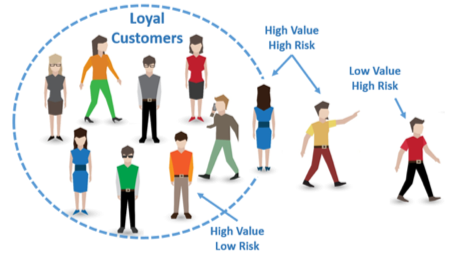

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
df = pd.read_csv('churndata_processed.csv')

In [3]:
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7043.0,0.433551,0.398231,0.0,0.000000,0.250000,0.750000,1.0
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
contract,7043.0,0.377396,0.424234,0.0,0.000000,0.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [6]:
df.corr()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
months,1.000000,0.321235,0.046863,0.315527,0.349682,0.350511,0.310377,0.031219,0.629463,0.003924,...,0.055491,-0.123784,0.007804,0.029646,-0.037735,0.401638,0.340577,-0.026761,-0.234338,-0.391121
multiple,0.321235,1.000000,0.091679,0.098108,0.202237,0.201137,0.100571,0.159669,0.120475,0.163530,...,-0.102332,-0.091576,-0.141726,0.359797,-0.210564,0.163428,0.101441,0.014575,-0.039021,-0.154137
gb_mon,0.046863,0.091679,1.000000,0.234738,0.229254,0.225877,0.223924,0.395209,-0.093588,0.142999,...,-0.096806,-0.043116,0.189763,0.191512,-0.528450,0.038480,0.018397,0.021679,-0.030202,-0.002380
security,0.315527,0.098108,0.234738,1.000000,0.283832,0.275438,0.354931,0.265037,0.228371,-0.003636,...,0.041805,-0.029513,0.240403,-0.024751,-0.333403,0.177625,0.089664,-0.009290,-0.057919,-0.132006
backup,0.349682,0.202237,0.229254,0.283832,1.000000,0.303546,0.294233,0.283855,0.159355,0.126735,...,-0.035564,-0.081179,0.120729,0.167258,-0.381593,0.181239,0.105777,-0.007771,-0.081859,-0.136721
protection,0.350511,0.201137,0.225877,0.275438,0.303546,1.000000,0.333313,0.296619,0.217698,0.103797,...,-0.038203,-0.062323,0.110683,0.175230,-0.380754,0.177382,0.091731,0.010519,-0.074860,-0.147336
support,0.310377,0.100571,0.223924,0.354931,0.294233,0.333313,1.000000,0.251496,0.269251,0.037880,...,0.042449,-0.036790,0.229289,-0.015673,-0.336298,0.169983,0.058263,0.004729,-0.057860,-0.143183
unlimited,0.031219,0.159669,0.395209,0.265037,0.283855,0.296619,0.251496,1.000000,-0.141168,0.245215,...,-0.170130,-0.065785,0.215137,0.349348,-0.755734,0.020459,0.016824,0.010811,-0.032038,0.000625
contract,0.629463,0.120475,-0.093588,0.228371,0.159355,0.217698,0.269251,-0.141168,1.000000,-0.149583,...,0.164698,-0.051972,0.030445,-0.193237,0.202376,0.333117,0.144255,-0.022912,-0.137305,-0.253319
paperless,0.003924,0.163530,0.142999,-0.003636,0.126735,0.103797,0.037880,0.245215,-0.149583,1.000000,...,-0.159922,-0.061013,-0.054104,0.320088,-0.321013,0.002261,0.014393,0.006416,-0.011901,0.006596


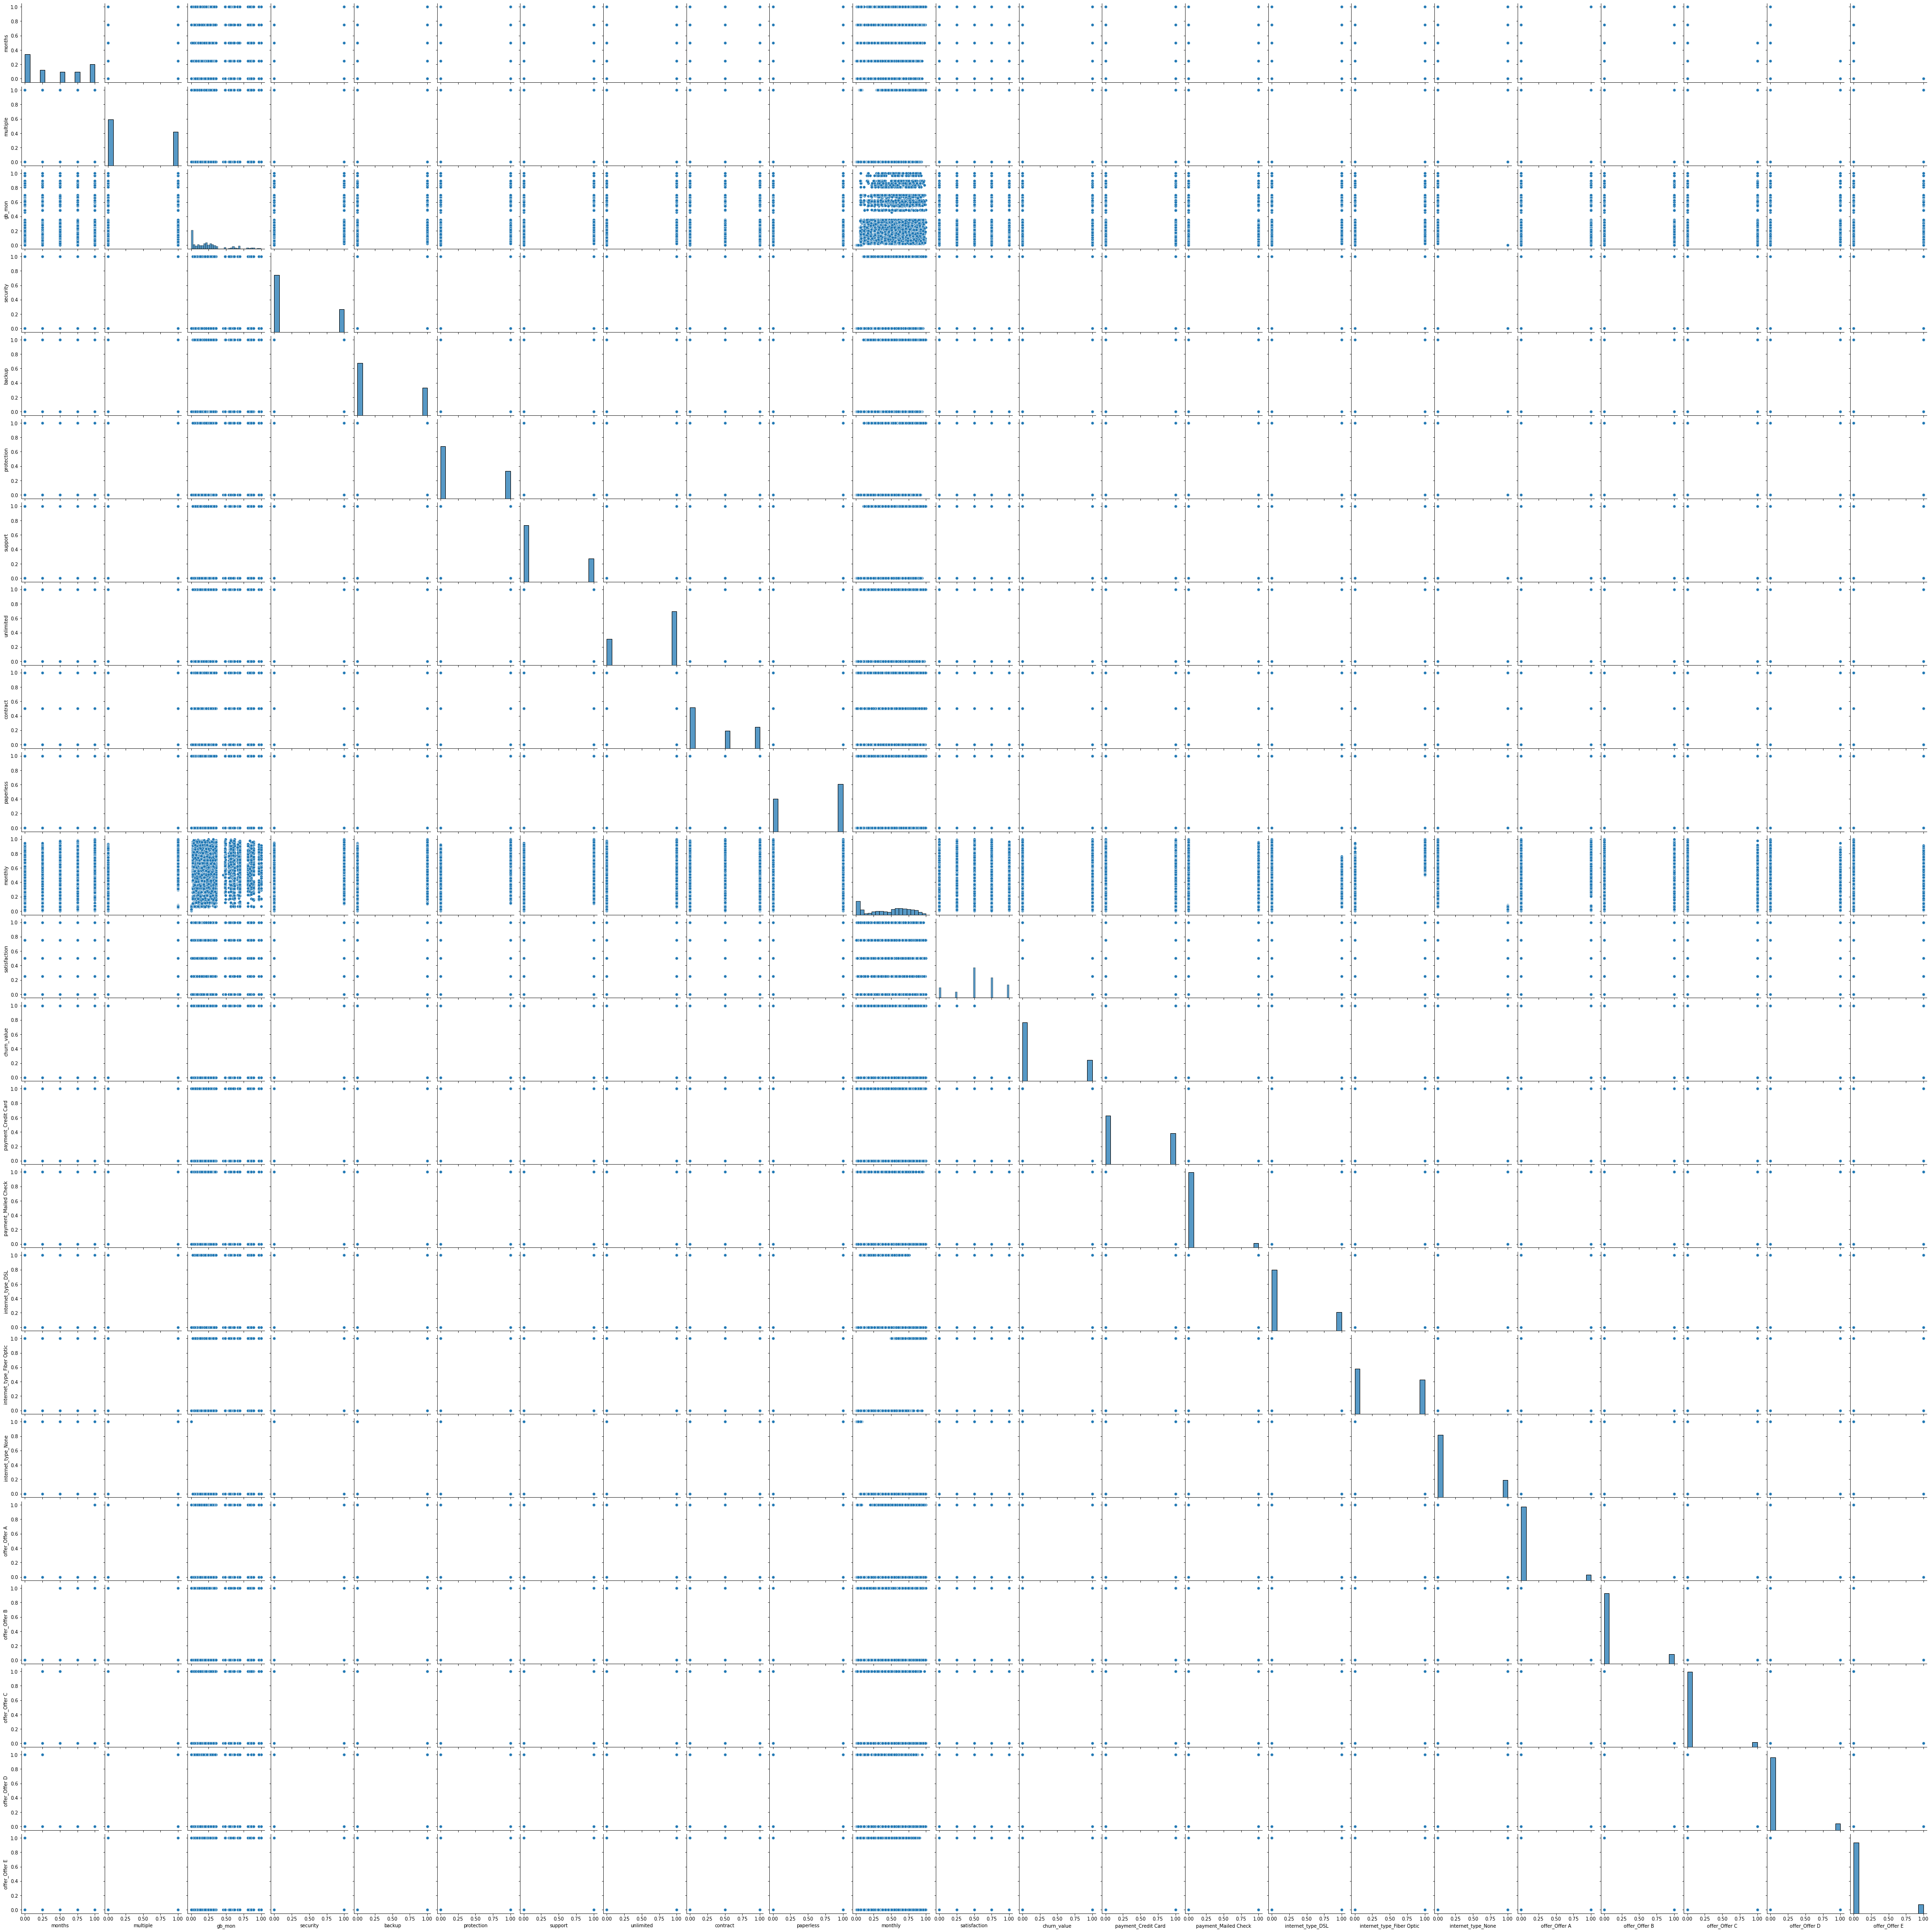

In [7]:
sns.pairplot(df)

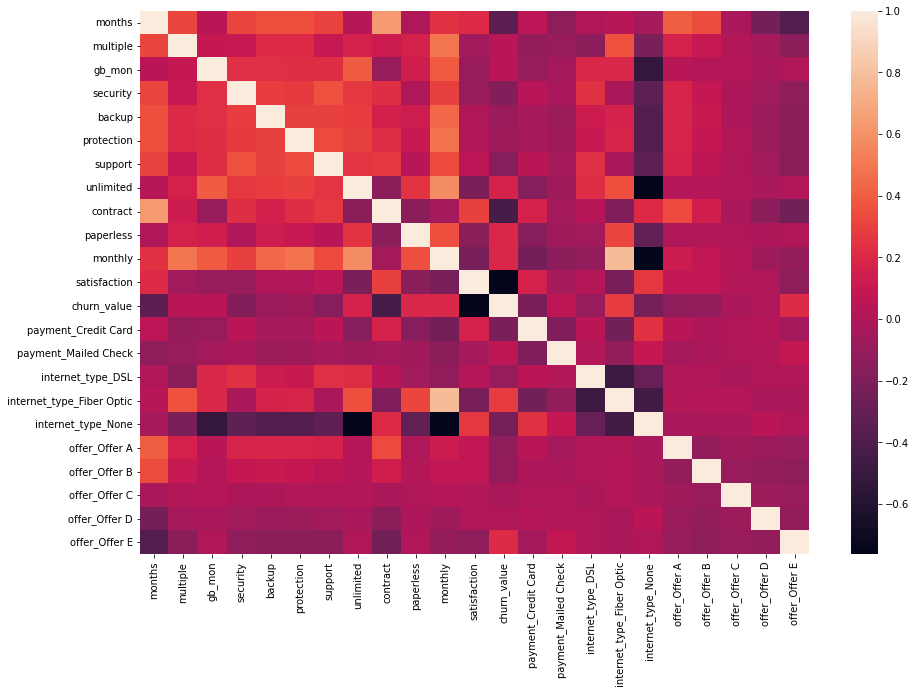

In [8]:
fig, ax= plt.subplots(figsize=(15,10))
sns.heatmap(df.corr())

In [9]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

Predicting Churn value

In [10]:
y = df['churn_value']
X = df.drop('churn_value', axis=1)

In [11]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)

In [12]:
X_train.shape

(4930, 22)

In [13]:
y_train.shape

(4930,)

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train, y_train)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


,oob
n_trees,
15.0,0.053955
20.0,0.054970
30.0,0.052333
40.0,0.053347
50.0,0.053550
100.0,0.049696
150.0,0.049290
200.0,0.048276
300.0,0.049899


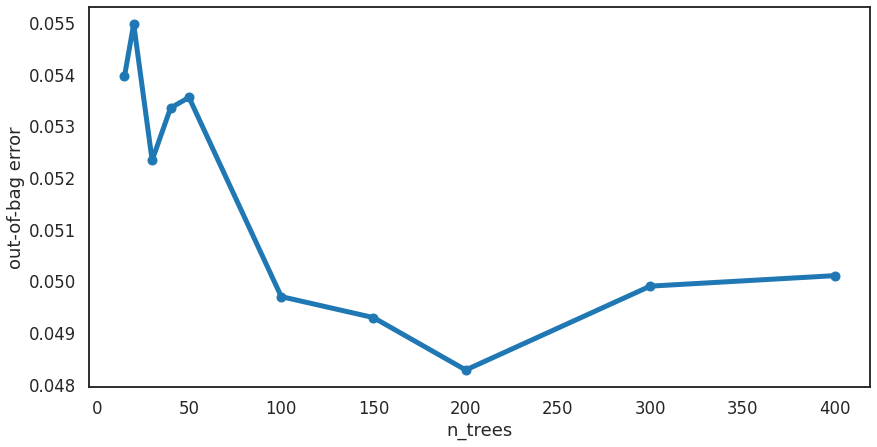

In [15]:
sns.set_context('talk')
sns.set_style('white')

ax = rf_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [16]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the random forest estimator
# Note that the number of trees is not setup here
EF = ExtraTreesClassifier(oob_score=True, 
                          random_state=42, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

# Iterate through all of the possibilities for 
# number of trees
for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    
    # Use this to set the number of trees
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)

    # oob error
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,


,oob
n_trees,
15.0,0.071197
20.0,0.066126
30.0,0.062677
40.0,0.057404
50.0,0.056389
100.0,0.054564
150.0,0.051521
200.0,0.050507
300.0,0.050101


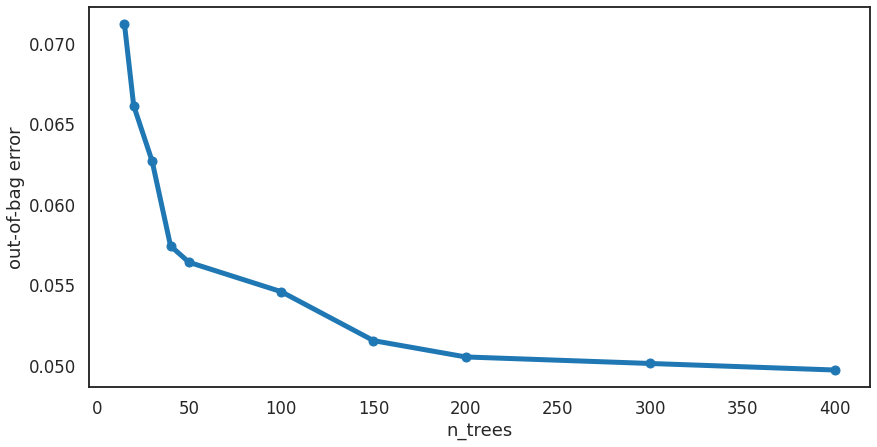

In [17]:
sns.set_context('talk')
sns.set_style('white')

ax = et_oob_df.plot(legend=False, marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [18]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.053955,0.071197
20.0,0.054970,0.066126
30.0,0.052333,0.062677
40.0,0.053347,0.057404
50.0,0.053550,0.056389
100.0,0.049696,0.054564
150.0,0.049290,0.051521
200.0,0.048276,0.050507
300.0,0.049899,0.050101


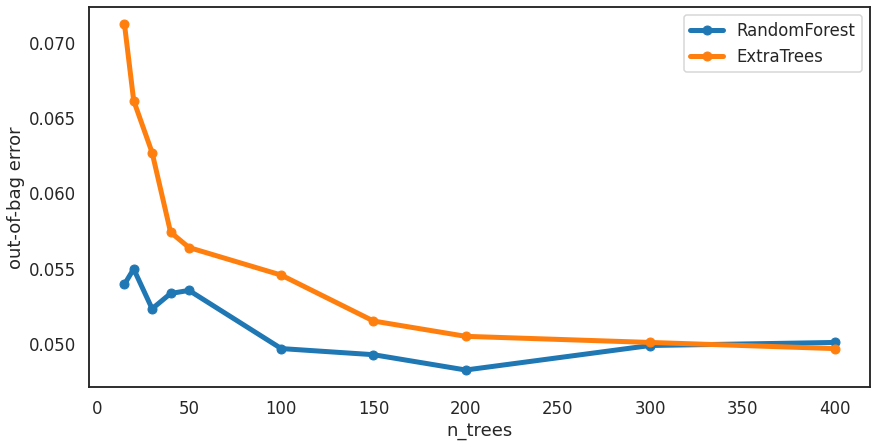

In [19]:
sns.set_context('talk')
sns.set_style('white')

ax = oob_df.plot(marker='o', figsize=(14, 7), linewidth=5)
ax.set(ylabel='out-of-bag error');

In [20]:
# Random forest with 100 estimators
model = RF.set_params(n_estimators=100)

y_pred = model.predict(X_test)

In [21]:
y_prob = model.predict_proba(X_test)
y_prob

array([[0.98      , 0.02      ],
       [0.975     , 0.025     ],
       [0.88658929, 0.11341071],
       ...,
       [0.9625    , 0.0375    ],
       [0.11      , 0.89      ],
       [0.955     , 0.045     ]])

In [22]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

cr = classification_report(y_test, y_pred)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_pred),
                         'precision': precision_score(y_test, y_pred),
                         'recall': recall_score(y_test, y_pred),
                         'f1': f1_score(y_test, y_pred),
                         'auc': roc_auc_score(y_test, y_pred)},
                         index=pd.Index([0]))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1529
           1       0.94      0.88      0.91       584

    accuracy                           0.95      2113
   macro avg       0.95      0.93      0.94      2113
weighted avg       0.95      0.95      0.95      2113



Text(0.5, 73.5, 'Ground Truth')

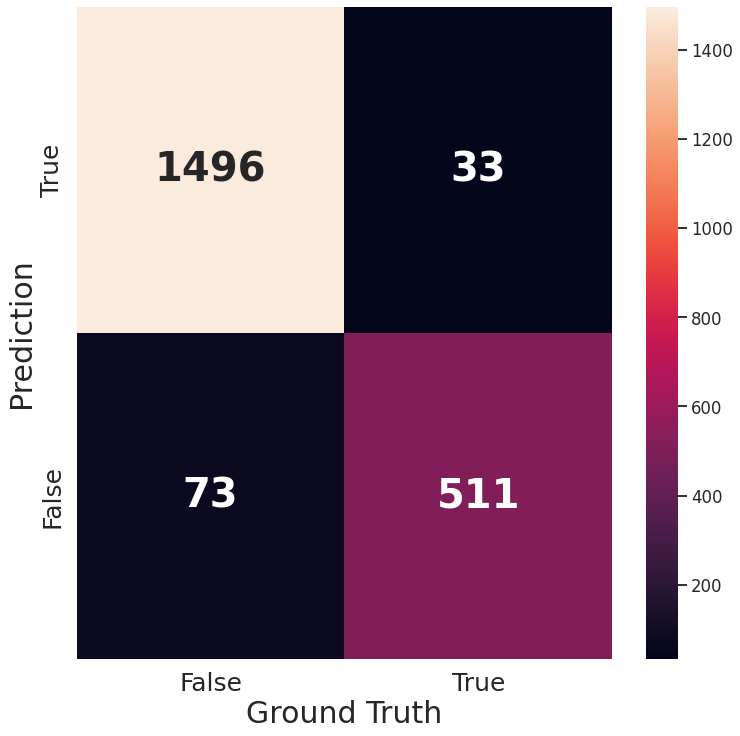

In [23]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

sns.set_context('talk')
cm = confusion_matrix(y_test, y_pred)
_, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(cm, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})

labels = ['False', 'True']
ax.set_xticklabels(labels, fontsize=25);
ax.set_yticklabels(labels[::-1], fontsize=25);
ax.set_ylabel('Prediction', fontsize=30);
ax.set_xlabel('Ground Truth', fontsize=30)

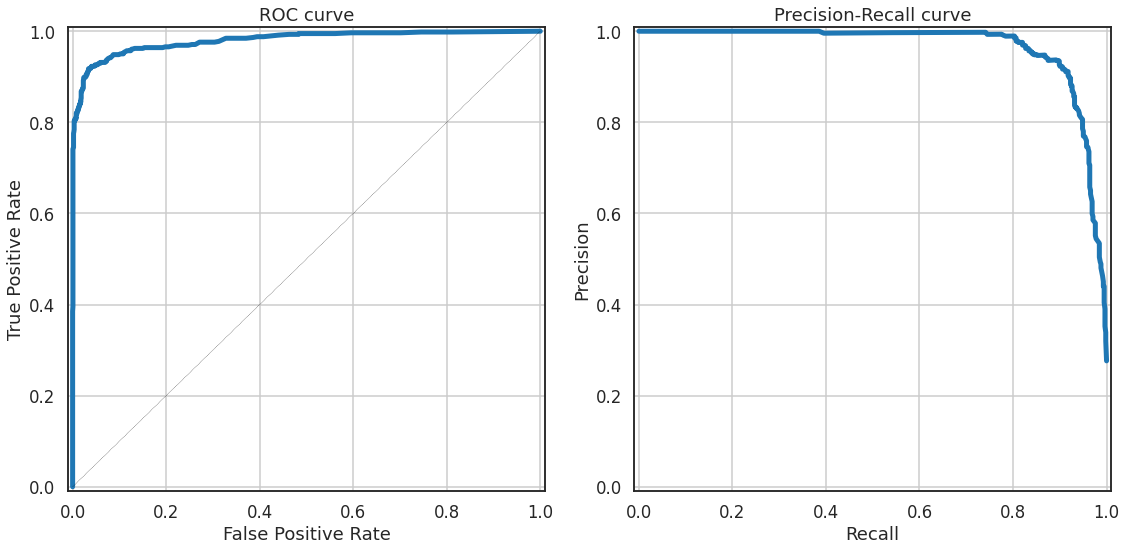

In [24]:
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(16, 8)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test)

# Plot the ROC-AUC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr, linewidth=5)
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision,  linewidth=5)
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

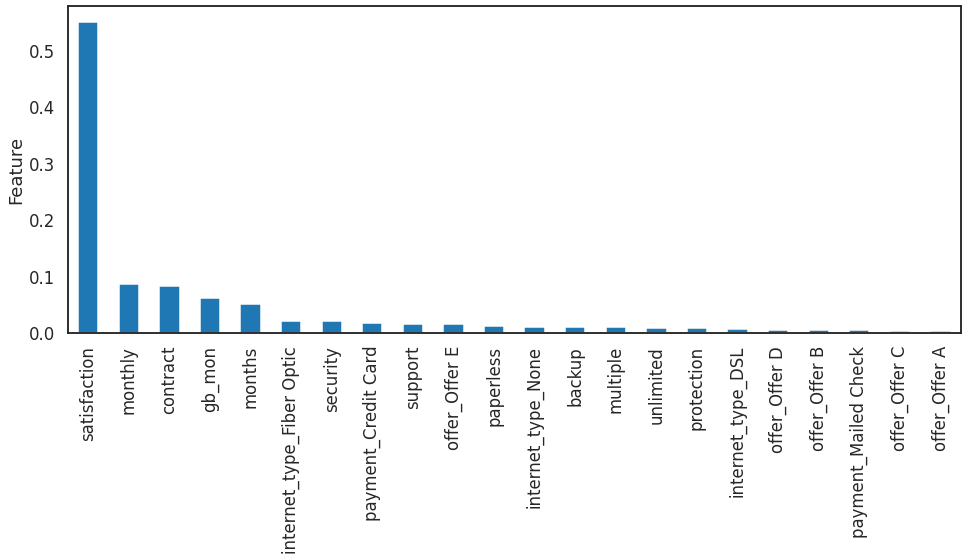

In [25]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(16, 6))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');